# 3x3 Lieb lattice equalization

## Hubbard parameters calculation

Lieb lattice size adjust to: [3 3]
V = [-35.62139985 -34.86282121 -35.62139991 -36.18381632 -36.18381627
 -35.62139991 -34.86282121 -35.62139991]
t = [0.09034124 0.09034123 0.28781423 0.28781428 0.28781429 0.09034126
 0.28781428 0.09034123]
U = [0.69567791 0.73836412 0.69567791 0.6761386  0.67613861 0.69567791
 0.73836412 0.69567791]
V_err = 0.013201539905583697
t_err = 9.948920365633505e-08
U_err = 0.032429805651916


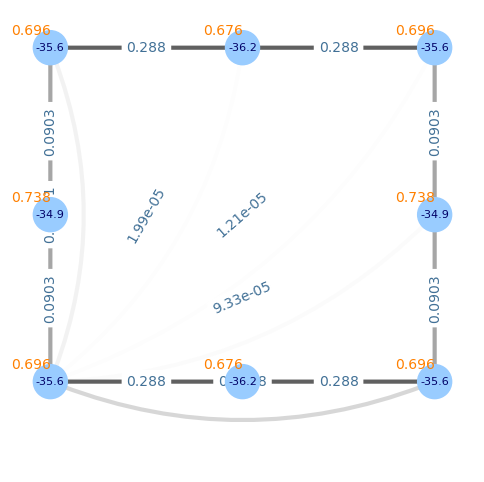

In [3]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
d = 3
shape = 'Lieb'
w = None
eqt = 'neq'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, L], dtype=int),
                 band=1,
                 dim=d,
                 avg=0.5,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)
fn = f'../data/{d}D_{L}x{L}_{shape}_{w}_{eqt}.ini'
report = rep.get_report(fn)
G.U, G.A = read_parameters(report)
G.draw_graph(nnn=True, A=G.A, U=G.U)
print(f'V = {np.diag(G.A)}')
t = abs(G.nn_tunneling(G.A))
print(f't = {t}')
print(f'U = {G.U}')
print(f'V_err = {G.v_cost_func(G.A, None)}')
print(f't_err = {G.t_cost_func(G.A, None, None)}')
print(f'U_err = {G.u_cost_func(G.U, None)}')


## Equalization

As $t$ equalization comes free in 3x3, we need to equalize `uv` only.

#### NOTE:

1. Other pattern
   1. The previous good equalization is because `uvt` is not fixed to some value.
      1. If they are fixed the result is not that good (show plots!).
      2. SSH tunneling? Clever way of fixing
2. 3x3 Lieb
   1. The 3x3 Lieb is not equalized well if `uvt` instead of `uv` used.
      1. 1e-3 ~ 1e-2
      2. Why minimization is not doing well automatically?
         1. Similar to previous case with 4x1? 4x1 minimum is found nonzero by changing algorithm
         2. Sometims SLSQP fails with "inequality constraint incompatible"
            1. SAVE THE FILE OF FAILED ONE!
            2. HOW TO CHECK IF ALGORITHM WORKS WELL FOR LARGE SYSTEMS?
      3. `t` comes free in 3x3 Lieb, that's part of the reason. But why `minimize` can't find that?
         1. See other algorithms?
         2. Check 3x3!
3. 3x3 square
   1. Check lattice equalization
4. 5x5 Lieb
   1. 5x5 Lieb can't be equalzied within 12h on NOTS
      1. Use worse grid? Necessary?
      2. Proof-of-principle show smaller lattice only?
5. Effect of 8x1 waist=None? Check
6. DVR convergence
   1. 8x1 chain checked
   2. Good in current grid $L$ and $dx$
7. Other geometries
   1. Zig-zag needs nontrivial modification on symmetry but is doable
   2. Ring? No need to equalize


Lieb lattice size adjust to: [3 3]
V = [-35.61669403 -35.1547354  -35.61669404 -36.05250323 -36.05250321
 -35.61669399 -35.1547354  -35.61669401]
t = [0.09057447 0.09057447 0.26898311 0.26898312 0.26898308 0.09057447
 0.26898309 0.09057447]
U = [0.69839698 0.7383762  0.69839698 0.67886921 0.67886921 0.69839699
 0.7383762  0.69839699]
V_err = 0.008915326437794373
t_err = 4.010121168292036e-08
U_err = 0.030776044527784853


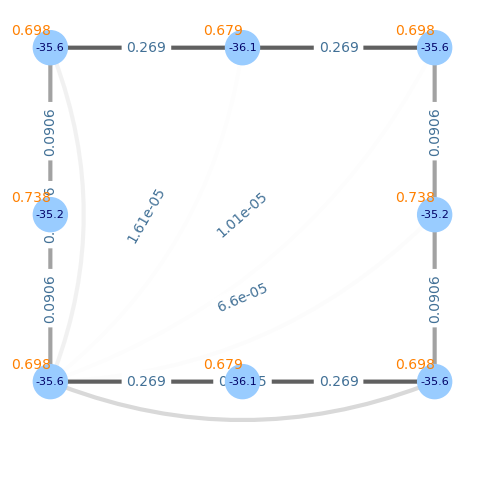

In [3]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
d = 3
shape = 'Lieb'
w = 'xy'
eqt = 'uvt'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, L], dtype=int),
                 band=1,
                 dim=d,
                 avg=0.5,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)
fn = f'../data/{d}D_{L}x{L}_{shape}_{w}_{eqt}.ini'
report = rep.get_report(fn)
G.U, G.A = read_parameters(report)
G.draw_graph(nnn=True, A=G.A, U=G.U)
print(f'V = {np.diag(G.A)}')
t = abs(G.nn_tunneling(G.A))
print(f't = {t}')
print(f'U = {G.U}')
print(f'V_err = {G.v_cost_func(G.A, None)}')
print(f't_err = {G.t_cost_func(G.A, None, None)}')
print(f'U_err = {G.u_cost_func(G.U, None)}')


Lieb lattice size adjust to: [3 3]
V = [-34.59740571 -34.59743758 -34.59740576 -34.59738138 -34.59738133
 -34.59740576 -34.59743758 -34.59740576]
t = [0.13902638 0.13902638 0.2025706  0.2025706  0.2025706  0.13902638
 0.2025706  0.13902638]
U = [0.70102145 0.70102152 0.70102144 0.70102158 0.70102158 0.70102144
 0.70102152 0.70102144]
V_err = 5.771383553237334e-07
t_err = 1.7209415112528121e-09
U_err = 8.434650156120647e-08


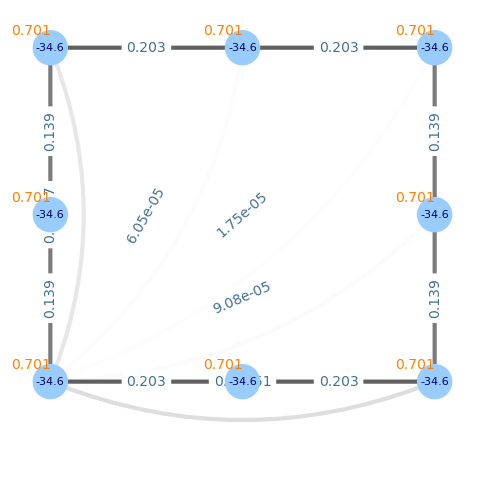

In [4]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
d = 3
shape = 'Lieb'
w = 'xy'
eqt = 'uv'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, L], dtype=int),
                 band=1,
                 dim=d,
                 avg=0.5,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)
fn = f'../data/{d}D_{L}x{L}_{shape}_{w}_{eqt}.ini'
report = rep.get_report(fn)
G.U, G.A = read_parameters(report)
G.draw_graph(nnn=True, A=G.A, U=G.U)
print(f'V = {np.diag(G.A)}')
t = abs(G.nn_tunneling(G.A))
print(f't = {t}')
print(f'U = {G.U}')
print(f'V_err = {G.v_cost_func(G.A, None)}')
print(f't_err = {G.t_cost_func(G.A, None, None)}')
print(f'U_err = {G.u_cost_func(G.U, None)}')


Lieb lattice size adjust to: [3 3]
V = [-35.62725624 -35.63086533 -35.62725625 -35.83120102 -35.83120102
 -35.62725625 -35.63086532 -35.62725625]
t = [0.11432149 0.11432149 0.11984007 0.11984007 0.11984007 0.11432149
 0.11984007 0.11432149]
U = [0.74633083 0.73901981 0.74633083 0.73974456 0.73974456 0.74633083
 0.73901982 0.74633083]
V_err = 0.0024608805932994793
t_err = 6.065330143901087e-09
U_err = 0.004689677562914642


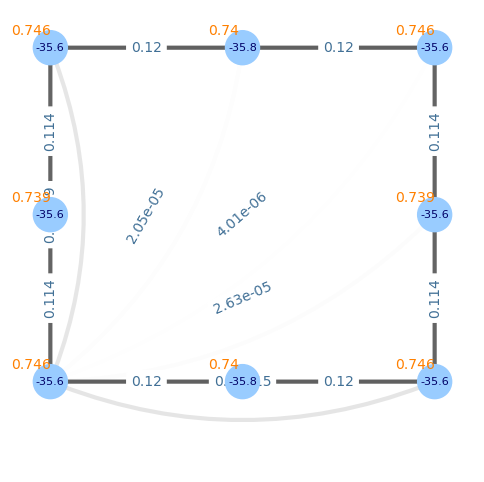

In [4]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
d = 3
shape = 'Lieb'
w = 'xy'
eqt = 'vt'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, L], dtype=int),
                 band=1,
                 dim=d,
                 avg=0.5,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)
fn = f'../data/{d}D_{L}x{L}_{shape}_{w}_{eqt}.ini'
report = rep.get_report(fn)
G.U, G.A = read_parameters(report)
G.draw_graph(nnn=True, A=G.A, U=G.U)
print(f'V = {np.diag(G.A)}')
t = abs(G.nn_tunneling(G.A))
print(f't = {t}')
print(f'U = {G.U}')
print(f'V_err = {G.v_cost_func(G.A, None)}')
print(f't_err = {G.t_cost_func(G.A, None, None)}')
print(f'U_err = {G.u_cost_func(G.U, None)}')


Lieb lattice size adjust to: [3 3]
V = [-34.91722783 -34.42847458 -34.91722782 -34.98781833 -34.98781828
 -34.91722783 -34.42847458 -34.91722788]
t = [0.21849086 0.21849086 0.22002654 0.22002654 0.22002654 0.21849086
 0.22002655 0.21849086]
U = [0.66974399 0.66852532 0.66974399 0.6795901  0.6795901  0.66974399
 0.66852532 0.66974399]
V_err = 0.00642551283460078
t_err = 1.1063339144065182e-08
U_err = 0.0066485702708874465


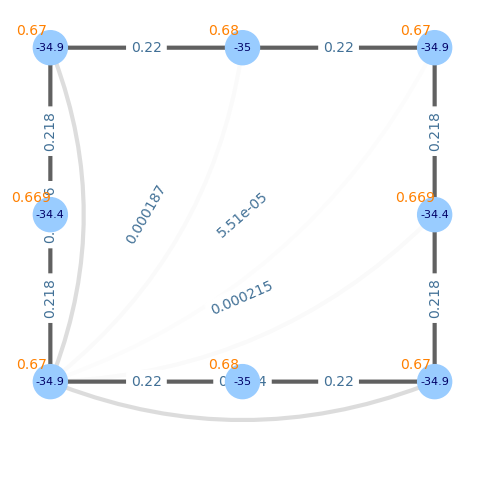

In [ ]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
d = 3
shape = 'Lieb'
w = None
eqt = 'uvt'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, L], dtype=int),
                 band=1,
                 dim=d,
                 avg=0.5,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)
fn = f'../data/{d}D_{L}x{L}_{shape}_{w}_{eqt}.ini'
report = rep.get_report(fn)
G.U, G.A = read_parameters(report)
G.draw_graph(nnn=True, A=G.A, U=G.U)
print(f'V = {np.diag(G.A)}')
t = abs(G.nn_tunneling(G.A))
print(f't = {t}')
print(f'U = {G.U}')
print(f'V_err = {G.v_cost_func(G.A, None)}')
print(f't_err = {G.t_cost_func(G.A, None, None)}')
print(f'U_err = {G.u_cost_func(G.U, None)}')


In [5]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
d = 3
shape = 'Lieb'
w = None
eqt = 'uv'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, L], dtype=int),
                 band=1,
                 dim=d,
                 avg=0.5,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)
fn = f'../data/{d}D_{L}x{L}_{shape}_{w}_{eqt}.ini'
report = rep.get_report(fn)
G.U, G.A = read_parameters(report)
G.draw_graph(nnn=True, A=G.A, U=G.U)
print(f'V = {np.diag(G.A)}')
t = abs(G.nn_tunneling(G.A))
print(f't = {t}')
print(f'U = {G.U}')
print(f'V_err = {G.v_cost_func(G.A, None)}')
print(f't_err = {G.t_cost_func(G.A, None, None)}')
print(f'U_err = {G.u_cost_func(G.U, None)}')


Lieb lattice size adjust to: [3 3]


IndexError: index 0 is out of bounds for axis 0 with size 0

Lieb lattice size adjust to: [3 3]
V = [-35.75478244 -34.44442421 -35.75478242 -36.29237522 -36.29237526
 -35.75478244 -34.44442421 -35.75478243]
t = [0.10027684 0.10027684 0.24500225 0.24500223 0.24500225 0.10027684
 0.24500224 0.10027684]
U = [0.70598599 0.72373036 0.705986   0.69274085 0.69274085 0.70598599
 0.72373036 0.70598599]
V_err = 0.019158693935306167
t_err = 3.0975592070977187e-08
U_err = 0.015576102821812435


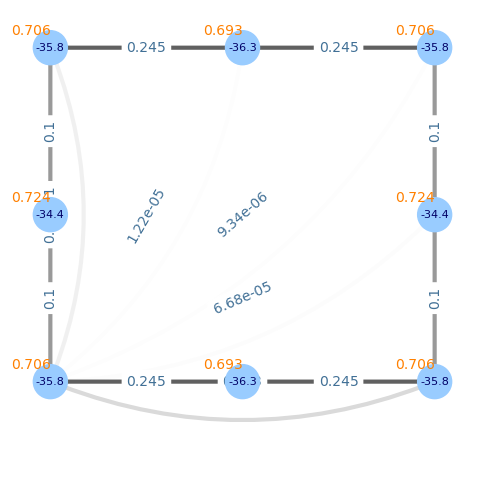

In [5]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
d = 3
shape = 'Lieb'
w = None
eqt = 'vt'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, L], dtype=int),
                 band=1,
                 dim=d,
                 avg=0.5,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)
fn = f'../data/{d}D_{L}x{L}_{shape}_{w}_{eqt}.ini'
report = rep.get_report(fn)
G.U, G.A = read_parameters(report)
G.draw_graph(nnn=True, A=G.A, U=G.U)
print(f'V = {np.diag(G.A)}')
t = abs(G.nn_tunneling(G.A))
print(f't = {t}')
print(f'U = {G.U}')
print(f'V_err = {G.v_cost_func(G.A, None)}')
print(f't_err = {G.t_cost_func(G.A, None, None)}')
print(f'U_err = {G.u_cost_func(G.U, None)}')


# 3x3 square lattice equalization

V = [-35.64354932 -36.08746291 -35.6435493  -36.64455848 -37.09460886
 -36.64455851 -35.6435493  -36.08746291 -35.6435493 ]
t = [0.09043388 0.09043388 0.29063465 0.28961345 0.08791926 0.29063461
 0.08791926 0.29063462 0.28961344 0.09043389 0.29063461 0.09043388]
U = [0.69116159 0.66265994 0.69116159 0.64643876 0.6182124  0.64643876
 0.69116159 0.66265994 0.69116159]
V_err = 0.014324192924258648
t_err = 0.009428643449468315
U_err = 0.037403777219098586


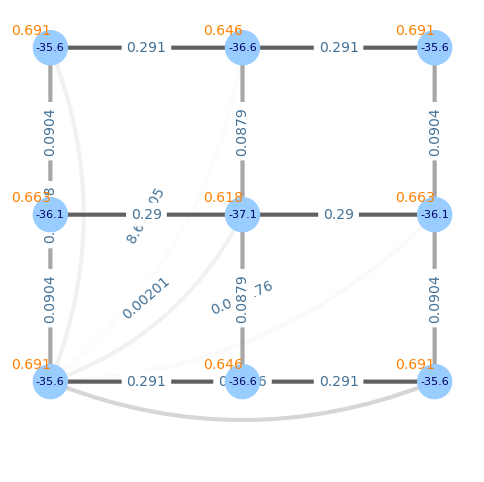

In [1]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
L = 3
d = 3
shape = 'square'
w = None
eqt = 'neq'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([L, L], dtype=int),
                 band=1,
                 dim=d,
                 avg=0.5,
                 sparse=True,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)
fn = f'../data/{d}D_{L}x{L}_{shape}_{w}_{eqt}.ini'
report = rep.get_report(fn)
G.U, G.A = read_parameters(report)
G.draw_graph(nnn=True, A=G.A, U=G.U)
print(f'V = {np.diag(G.A)}')
t = abs(G.nn_tunneling(G.A))
print(f't = {t}')
print(f'U = {G.U}')
print(f'V_err = {G.v_cost_func(G.A, None)}')
print(f't_err = {G.t_cost_func(G.A, None, None)}')
print(f'U_err = {G.u_cost_func(G.U, None)}')
